In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('car driving risk analysis.csv')

In [3]:
df

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72
5,115,10
6,50,7
7,230,85
8,190,45
9,260,91


In [5]:
df.shape

(15, 2)

In [7]:
df.head(3)

,speed,risk
0,200,95
1,90,20
2,300,98


# Plot

In [8]:
df.isnull().any()

speed    False
risk     False
dtype: bool

In [10]:
df.isnull().sum()

speed    0
risk     0
dtype: int64

Text(0.5, 1.0, 'Car driving risk analysis')

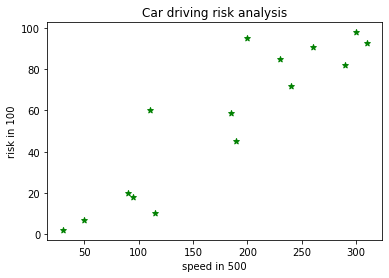

In [11]:
plt.scatter(df['speed'],df['risk'],marker='*',color='g')
plt.xlabel('speed in 500')
plt.ylabel('risk in 100')
plt.title("Car driving risk analysis")

# Separate dependent and independent variable¶

In [12]:
x = df[['speed']]

In [14]:
y=df['risk']

In [15]:
x

,speed
0,200
1,90
2,300
3,110
4,240
5,115
6,50
7,230
8,190
9,260


In [16]:
y

0     95
1     20
2     98
3     60
4     72
5     10
6      7
7     85
8     45
9     91
10    82
11    59
12    93
13    18
14     2
Name: risk, dtype: int64

# Split Data set

In [17]:
from sklearn.model_selection import train_test_split

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state =1)

In [40]:
xtrain

,speed
10,290
4,240
1,90
13,95
0,200
14,30
9,260
8,190
12,310
11,185


In [41]:
xtest

,speed
3,110
7,230
6,50
2,300


# Fitting Multiple Linear Regression to the Training set

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
regressor = LinearRegression()

In [44]:
regressor.fit(xtrain, ytrain)

LinearRegression()

In [45]:
regressor.predict(xtest)

array([26.995818  , 70.7763466 ,  5.1055537 , 96.31498829])

In [46]:
#one value predict 
regressor.predict([[210]])

array([63.47959184])

# Best fit line

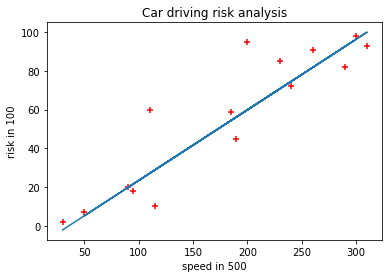

In [47]:
plt.xlabel('speed in 500')
plt.ylabel('risk in 100')
plt.scatter(df['speed'],df['risk'],marker='+',color='red')
plt.title("Car driving risk analysis")
plt.plot(df.speed,regressor.predict(df[['speed']]))

# R2 Value

In [48]:
from sklearn.metrics import r2_score

In [49]:
pred = regressor.predict(xtest)

In [50]:
score=r2_score(ytest,pred)

In [51]:
score

0.7325331677903208